# PREDIKSI PASIEN GAGAL JANTUNG
## Project Statistics For Business - Juniarto Kurniawan


### Pengantar

Regresi logistik adalah sebuah pendekatan untuk membuat model prediksi seperti halnya regresi linear atau yang biasa disebut dengan istilah Ordinary Least Squares (OLS) regression. Perbedaannya adalah pada regresi logistik, peneliti memprediksi variabel terikat yang berskala dikotomi. Skala dikotomi yang dimaksud adalah skala data nominal dengan dua kategori, misalnya: Ya dan Tidak, Baik dan Buruk atau Tinggi dan Rendah.

Apabila pada OLS mewajibkan syarat atau asumsi bahwa error varians (residual) terdistribusi secara normal. Sebaliknya, pada regresi ini tidak dibutuhkan asumsi tersebut sebab pada regresi jenis logistik ini mengikuti distribusi logistik.
Pada Analisis kali ini akan dilakukan prediksi kematian terhadap pasien gagal jantung dengan berdasarkan beberapa faktor/ Parameter yaitu :
1.	Usia
2.	Anemia
3.	High Blood Pressure
4.	Diabetes
5.	Sex
6.	Serum Ceratine
7.	Serum Sodium
8.	Smoking.
9.	Death Event (Target)


### Part I - Data Understanding

In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

In [2]:
#Load Dataset Pra Sample
data = pd.read_csv(r'D:\PELATIHAN DATA SCIENCE\Statistics For Business\heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Berdasarkan summary di atas dapat disimpulkan bahwa tidak terdapat data missing
Pada analisis ini tidak seluruh variable digunakan untuk melakukan prediksi, hanya beberapa variable penting yang akan digunakan untuk melakukan prediksi yaitu :

In [5]:
data_net = data.drop(['creatinine_phosphokinase','ejection_fraction','creatinine_phosphokinase','platelets','time'],axis = 1)
data_net.head()

,age,anaemia,diabetes,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,0,1,1.9,130,1,0,1
1,55.0,0,0,0,1.1,136,1,0,1
2,65.0,0,0,0,1.3,129,1,1,1
3,50.0,1,0,0,1.9,137,1,0,1
4,65.0,1,1,0,2.7,116,0,0,1


### Part II - Statistical Test for Proportion and Mean

#### Two Sample z test for proportion

In [6]:
from statsmodels.stats.proportion import proportions_ztest

In [7]:
# PROPORSI PASIEN MENINGGAL BERDASARKAN PENYAKIT ANEMIA
# The number of successes in observasion
anemia_cond = (data_net['anaemia'] == 1) & (data_net['DEATH_EVENT'] == 1)
non_anemia_cond = (data_net['anaemia'] == 0) & (data_net['DEATH_EVENT'] == 1)

anemia_data = data_net[anemia_cond]
non_anemia_data = data_net[non_anemia_cond]

anemia = len(anemia_data)
non_anemia  = len(non_anemia_data)

# The number of observations
n_anemia = len(data_net[data_net.anaemia == 1])
n_non_anemia = len(data_net[data_net.anaemia == 0])
n_non_anemia

# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [anemia, non_anemia], 
                                                nobs = [n_anemia, n_non_anemia], 
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

# Decision rule
if p_value<0.05:
    print("Menolak H0, Proporsi pasien gagal jantung yang meninggal dengan gejala anemia berbeda dengan non anemia")
else:
    print("Menerima H0,  Proporsi pasien gagal jantung yang meninggal dengan gejala anemia sama dengan non anemia")

The computed Z test statistic is:  1.1459
The p-value is:  0.1259
1.6448536269514722
Menerima H0,  Proporsi pasien gagal jantung yang meninggal dengan gejala anemia sama dengan non anemia


In [8]:
anemia

46

In [9]:
# PROPORSI PASIEN MENINGGAL BERDASARKAN RIWAYAT TEKANAN DARAH TINGGI
# The number of successes in observasion
high_blood_pressure_cond = (data_net['high_blood_pressure'] == 1) & (data_net['DEATH_EVENT'] == 1)
non_high_blood_pressure_cond = (data_net['high_blood_pressure'] == 0) & (data_net['DEATH_EVENT'] == 1)

high_blood_pressure_data = data_net[high_blood_pressure_cond]
non_high_blood_pressure_data = data_net[non_high_blood_pressure_cond]

high_blood_pressure = len(high_blood_pressure_data)
non_high_blood_pressure  = len(non_high_blood_pressure_data)

# The number of observations
n_high_blood_pressure = len(data_net[data_net.high_blood_pressure == 1])
n_non_high_blood_pressure = len(data_net[data_net.high_blood_pressure == 0])

# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [high_blood_pressure, non_high_blood_pressure], 
                                                nobs = [n_high_blood_pressure, n_non_high_blood_pressure], 
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

# Decision rule
if p_value<0.05:
    print("Menolak H0, Proporsi pasien gagal jantung yang meninggal dengan gejala tekanan darah tinggi berbeda dengan bukan tekanan darah tinggi")
else:
    print("Menerima H0,  Proporsi pasien gagal jantung yang meninggal dengan gejala tekanan darah tinggi sama dengan bukan tekanan darah tinggi")

The computed Z test statistic is:  1.3721
The p-value is:  0.085
1.6448536269514722
Menerima H0,  Proporsi pasien gagal jantung yang meninggal dengan gejala tekanan darah tinggi sama dengan bukan tekanan darah tinggi


In [10]:
# PROPORSI PASIEN MENINGGAL BERDASARKAN RIWAYAT DIABETES
# The number of successes in observasion
diabetes_cond = (data_net['diabetes'] == 1) & (data_net['DEATH_EVENT'] == 1)
non_diabetes_cond = (data_net['diabetes'] == 0) & (data_net['DEATH_EVENT'] == 1)

diabetes_data = data_net[diabetes_cond]
non_diabetes_data = data_net[non_diabetes_cond]

diabetes = len(diabetes_data)
non_diabetes  = len(non_diabetes_data)

# The number of observations
n_diabetes = len(data_net[data_net.diabetes == 1])
n_non_diabetes = len(data_net[data_net.diabetes == 0])

# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [diabetes, non_diabetes], 
                                                nobs = [n_diabetes, n_non_diabetes], 
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

# Decision rule
if p_value<0.05:
    print("Menolak H0, Proporsi pasien gagal jantung yang meninggal dengan riwayat diabetes berbeda dengan bukan diabetes")
else:
    print("Menerima H0,  Proporsi pasien gagal jantung yang meninggal dengan riwayat diabetes sama dengan bukan diabetes")

The computed Z test statistic is:  -0.0336
The p-value is:  0.5134
1.6448536269514722
Menerima H0,  Proporsi pasien gagal jantung yang meninggal dengan riwayat diabetes sama dengan bukan diabetes


In [11]:
# PROPORSI PASIEN MENINGGAL BERDASARKAN JENIS KELAMIN
# The number of successes in observasion
pria_cond = (data_net['sex'] == 1) & (data_net['DEATH_EVENT'] == 1)
wanita_cond = (data_net['sex'] == 0) & (data_net['DEATH_EVENT'] == 1)

pria_data = data_net[pria_cond]
wanita_data = data_net[wanita_cond]

pria = len(pria_data)
wanita  = len(wanita_data)

# The number of observations
n_pria = len(data_net[data_net.sex == 1])
n_wanita = len(data_net[data_net.sex == 0])

# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [pria, wanita], 
                                                nobs = [n_pria, n_wanita], 
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

# Decision rule
if p_value<0.05:
    print("Menolak H0, Proporsi pasien gagal jantung yang meninggal antara pria berbeda dengan wanita")
else:
    print("Menerima H0,  Proporsi pasien gagal jantung yang meninggal antara pria sama dengan wanita")

The computed Z test statistic is:  -0.0746
The p-value is:  0.5297
1.6448536269514722
Menerima H0,  Proporsi pasien gagal jantung yang meninggal antara pria sama dengan wanita


In [12]:
# PROPORSI PASIEN MENINGGAL BERDASARKAN RIWAYAT MEROKOK
# The number of successes in observasion
smoking_cond = (data_net['smoking'] == 1) & (data_net['DEATH_EVENT'] == 1)
non_smoking_cond = (data_net['smoking'] == 0) & (data_net['DEATH_EVENT'] == 1)

smoking_data = data_net[smoking_cond]
non_smoking_data = data_net[non_smoking_cond]

smoking = len(smoking_data)
non_smoking  = len(non_smoking_data)

# The number of observations
n_smoking = len(data_net[data_net.smoking == 1])
n_non_smoking = len(data_net[data_net.smoking == 0])

# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [smoking, non_smoking], 
                                                nobs = [n_smoking, n_non_smoking], 
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

# Decision rule
if p_value<0.05:
    print("Menolak H0, Proporsi pasien gagal jantung yang meninggal dengan riwayat perokok berbeda dengan bukan perokok")
else:
    print("Menrima H0,  Proporsi pasien gagal jantung yang meninggal dengan riwayat perokok sama dengan bukan perokok")

The computed Z test statistic is:  -0.2183
The p-value is:  0.5864
1.6448536269514722
Menrima H0,  Proporsi pasien gagal jantung yang meninggal dengan riwayat perokok sama dengan bukan perokok


#### Two Sample t test for mean

RATA-RATA USIA PASIEN SERANGAN JANTUNG YANG MENINGGAL BERBEDA DENGAN YANG SELAMAT

In [13]:
# PREANALYSIS
data_net.groupby('DEATH_EVENT')["age"].mean()

DEATH_EVENT
0    58.761906
1    65.215281
Name: age, dtype: float64

In [14]:
#ANALYSIS
# Pasien Selamnat
usia_selamat = data_net[data_net['DEATH_EVENT']==0]['age'].values

# Pasien Meninggal
usia_meninggal = data_net[data_net['DEATH_EVENT']==1]['age'].values

# variance 
print("variance berbeda, sehingga gunakan t_test")
np.var(usia_selamat), np.var(usia_meninggal)

variance berbeda, sehingga gunakan t_test


(112.60724685330877, 172.80547574381512)

In [15]:
#Statistik Uji
result = stats.ttest_ind(a = usia_selamat, 
                         b = usia_meninggal, 
                         equal_var=False, 
                         alternative = "greater")

print(result)

# Menentukan aturan keputusan
if result.pvalue<0.05:
    print("Menolak H0, Rata-rata usia pasien meninggal berbeda dengan pasien selamat")
else:
    print("Menerima H0, Rata-rata usia pasien meninggal sama dengan pasien selamat")

Ttest_indResult(statistic=-4.186210205663688, pvalue=0.9999763239274116)
Menerima H0, Rata-rata usia pasien meninggal sama dengan pasien selamat


RATA-RATA PENGGUNAAN SERUM CREATININ PASIEN SERANGAN JANTUNG YANG MENINGGAL BERBEDA DENGAN YANG SELAMAT


In [16]:
# PREANALYSIS
data_net.groupby('DEATH_EVENT')["serum_creatinine"].mean()

DEATH_EVENT
0    1.184877
1    1.835833
Name: serum_creatinine, dtype: float64

In [17]:
#ANALYSIS
# Pasien Selamnat
creatinine_selamat = data_net[data_net['DEATH_EVENT']==0]['serum_creatinine'].values

# Pasien Meninggal
creatinine_meninggal = data_net[data_net['DEATH_EVENT']==1]['serum_creatinine'].values

# variance 
print("variance berbeda, sehingga gunakan t_test")
np.var(creatinine_selamat), np.var(creatinine_meninggal)

variance berbeda, sehingga gunakan t_test


(0.42571661044917375, 2.134207638888889)

In [18]:
#Statistik Uji
result = stats.ttest_ind(a = creatinine_selamat, 
                         b = creatinine_meninggal, 
                         equal_var=False, 
                         alternative = "greater")

print(result)

# Menentukan aturan keputusan
if result.pvalue<0.05:
    print("Menolak H0, Rata-rata penggnaan serum creatinin pasien meninggal berbeda dengan pasien selamat")
else:
    print("Menerima H0, Rata-rata penggnaan serum creatinin pasien meninggal sama dengan pasien selamat")

Ttest_indResult(statistic=-4.152639017521322, pvalue=0.9999680051883002)
Menerima H0, Rata-rata penggnaan serum creatinin pasien meninggal sama dengan pasien selamat


RATA-RATA PENGGUNAAN SERUM SODIUM PASIEN SERANGAN JANTUNG YANG MENINGGAL BERBEDA DENGAN YANG SELAMAT

In [19]:
# PREANALYSIS
data_net.groupby('DEATH_EVENT')["serum_sodium"].mean()

DEATH_EVENT
0    137.216749
1    135.375000
Name: serum_sodium, dtype: float64

In [20]:
#ANALYSIS
# Pasien Selamnat
sodium_selamat = data_net[data_net['DEATH_EVENT']==0]['serum_sodium'].values

# Pasien Meninggal
sodium_meninggal = data_net[data_net['DEATH_EVENT']==1]['serum_sodium'].values

# variance 
print("variance berbeda, sehingga gunakan t_test")
np.var(sodium_selamat), np.var(sodium_meninggal)

variance berbeda, sehingga gunakan t_test


(15.785532286636414, 24.755208333333332)

In [21]:
#Statistik Uji
result = stats.ttest_ind(a = sodium_selamat, 
                         b = sodium_meninggal, 
                         equal_var=False, 
                         alternative = "greater")
print(result)

# Menentukan aturan keputusan
if result.pvalue<0.05:
    print("Menolak H0, Rata-rata penggnaan serum sodium pasien meninggal berbeda dengan pasien selamat")
else:
    print("Menerima H0, Rata-rata penggnaan serum sodium pasien meninggal sama dengan pasien selamat")

Ttest_indResult(statistic=3.1645011835006565, pvalue=0.000936162415061617)
Menolak H0, Rata-rata penggnaan serum sodium pasien meninggal berbeda dengan pasien selamat


### Part III - Correlation Analysis

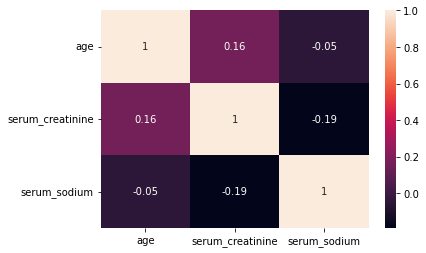

In [22]:
# Menghitung Korelasi
import seaborn as sns
import matplotlib.pyplot as plt

data_kor = data_net.drop(['anaemia','high_blood_pressure','diabetes','sex','smoking','DEATH_EVENT'],axis = 1)
matrix_kor = data_kor.corr().round(2)
sns.heatmap(matrix_kor, annot = True)
plt.show()

Dapat diketahui bahwa korelasi antar tiga variabel numerik yaitu Usia, Serum Creatinine dan Serum Sodium tersebut sangat rendah dimana korelasi trertinggi hanya sebesar 20% (korelasi serum sodium dan creatinine).

### Part IV - BUILDING REGRESSION MODEL

<Figure size 576x396 with 0 Axes>

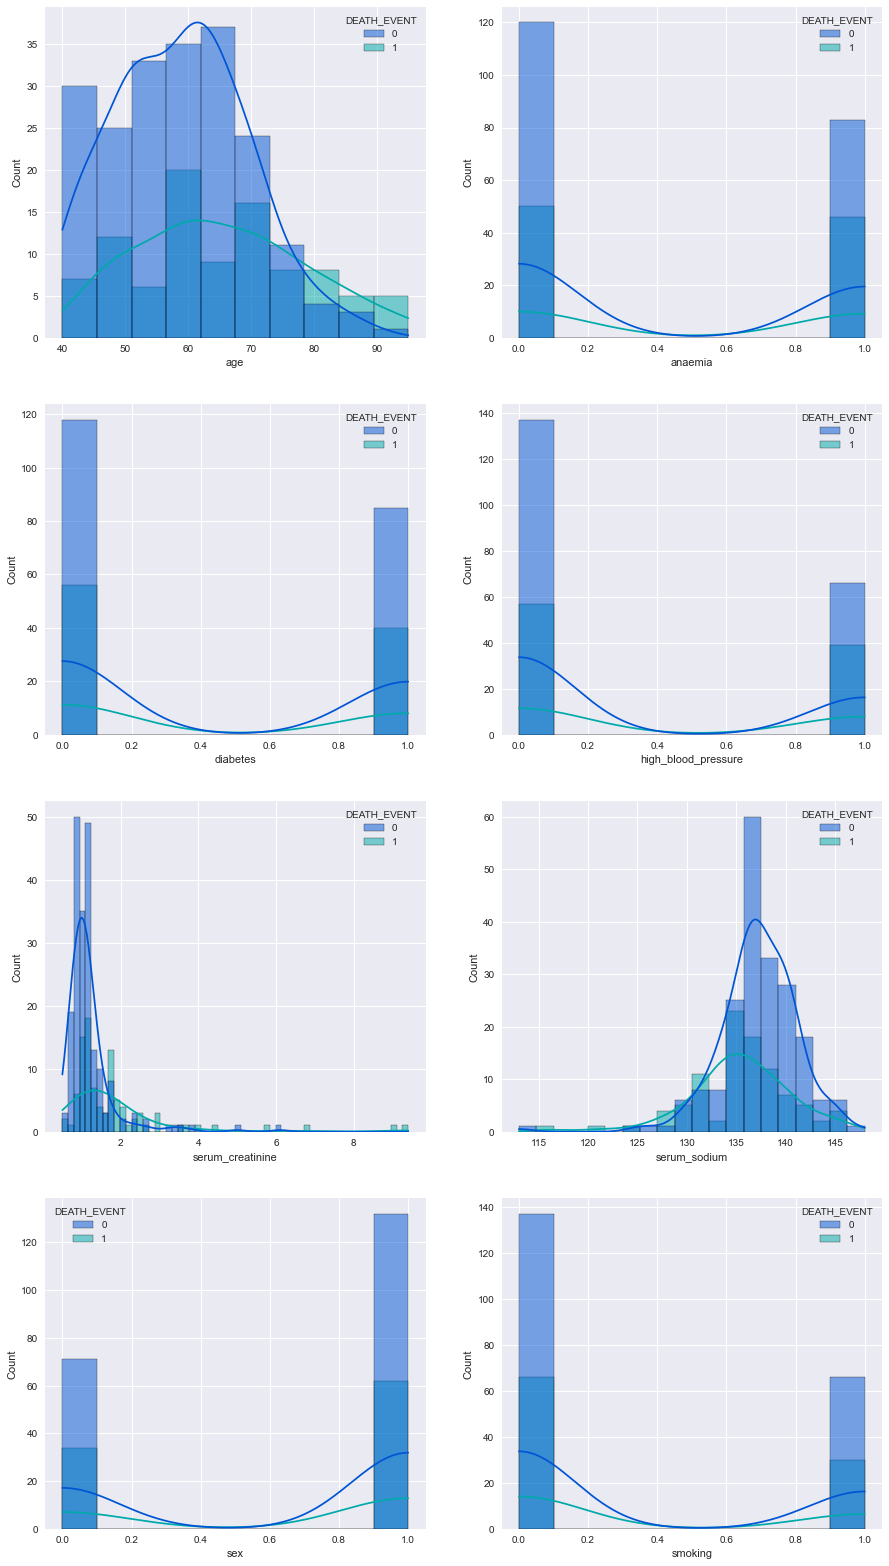

In [23]:
# EKSPLORATORY DATA ANLYSIS
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'winter'

fig, axs = plt.subplots(4, 2, figsize=(15,28))
i=1
for feature in data_net.columns:
    if feature not in ["DEATH_EVENT"] and i < 14:
        plt.subplot(4,2,i)
        sns.histplot(data=data_net, x=feature, kde=True, palette=color, hue='DEATH_EVENT')
        i+=1

INTERPRETASI
1. Age : Terlihat bahwa pasein meninggal berdasarkan umur terdapat pada rentang 60 - 70 tahun, namun menjadi perhatian adalahg banyak juga pasien gagal jantung yang selamat pada rentang yang cukup dini yaitu 40 -50 tahun. Hal ini menjadi perhatian bahwa penyakit jantunng itu bisa menyerah seseorah pada usia muda.
2. Anemia : Pasien gagal jantung dengan riwayat anemia mempunyai proporsi yang sama antar meninggal dan selamat dibandingkan dengan pasien gagal jantung tanpa anemia.
3. Diabetes : Pasien gagal jantung dengan riwayat diabetes mempunyai proporsi yang sama antar meninggal dan selamat dibandingkan dengan pasien gagal jantung tanpa diabetes.
4. Tekanan darah tinggi : Pasien gagal jantung dengan riwayat tekanan darah tinggi mempunyai proporsi yang sama antar meninggal dan selamat dibandingkan dengan pasien gagal jantung tanpa tekanan darah tinggi.
5. Merokok : Pasien gagal jantung dengan riwayat perokok mempunyai proporsi yang sama antar meninggal dan selamat dibandingkan dengan pasien gagal jantung tanpa riwayat merokok.

Dari Poin 2,3,4, dan 5 dapat dikatakan bahwa pasien gagal jantung yang memiliki penyakit penyerta (komorbid) akan cenderung lebih tinggi kemungkinan meninggal dibanding tanpa penyakit penyerta.

Penggunaan serum ceratinin baik pada pasien yang meninggal maupun selamat sebagian besar berapa pada dosis yang rendah, hal ini berbanding terbalik dengan penggunaan serum sodium dimana pada pasien yang meninggal dan selamat terdapat pada dosis yang tinggi.

Secara proporsi baik pasien yang meiniggal maupun selamat sebagian besar lebih banyak dengan jenis kelamin pria dibanding wanita.

#### LOGISTIC REGRESSION MODELLING
Melakukan seleksi variabel menggunakan Recursive Feature Elimination (RFE) agar dapat mengurangi variabel dengan tetap memepretahankan Kinerja Model

In [24]:
#Feature selection 
#Recursive feature elimination
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty='l1')
from sklearn.feature_selection import RFE

#Select best feature
y_data = data_net[["DEATH_EVENT"]]
X_data = data_net[["age", "anaemia", "diabetes", "high_blood_pressure", "serum_creatinine", "serum_sodium", "sex", "smoking"]]

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select= None)
fit = rfe.fit(X_data, y_data)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [False  True False  True  True  True False False]
Feature Ranking: [4 1 5 1 1 1 3 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Berdasarkan Hasil analisa RFE yang memiliki Output 1 maka variabel-variabel yang berkontribusi signifikan dalam memprediksi Death Event sebanyak 4 variabel yaitu Anaemia, High Blood Pressure, Serum Creatinine dan Serum Sodium. Selanjutnya akan dilakukan Modelling menggunakan 4 Variabel tersebut. 

In [25]:
# Import library modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

# Create Logit model object
logit_model = smf.logit("DEATH_EVENT ~ anaemia + high_blood_pressure + serum_creatinine + serum_sodium", data_net)

# Fit the model
model_heart = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    data_net = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return data_net

results_heart_coef = print_coef_std_err(model_heart)

Optimization terminated successfully.
         Current function value: 0.565041
         Iterations 6


In [26]:
results_heart_coef

,coef,std err
Intercept,7.646059,4.309829
anaemia,0.312633,0.267775
high_blood_pressure,0.466161,0.275054
serum_creatinine,0.755673,0.199184
serum_sodium,-0.071505,0.031231


$$P(\text{Death}) = \text{logit}^{-1}(7.65 + 0.31\text{Anaemia} + 0.47\text{High Blood Pressure} + 0.76\text{Serum Creatinine} - 0.07\text{Serum Sodium})$$

#### PART V. INTERPRETASI MODEL
1. Apabila terdapat dua pasien yang memiliki tekanan darah tinggi, kandungan creatinin, dan sodium yang sama maka peluang logit probabilitas untuk meninggal bertambah sebesar 0.31 lebih tinggi pada penderita anemia.
2. Apabila terdapat dua pasien yang memiliki anemia, kandungan creatinin, dan sodium yang sama maka peluang logit probabilitas untuk meninggal bertambah sebesar 0.47 lebih tinggi untuk setiap pasien yang memiliki perbedaan kenaikan satu unit saat pengukuran tekanan darah.
3. Apabila terdapat dua pasien yang memiliki anemia, tekanan darah tinggi, dan sodium yang sama maka peluang logit probabilitas untuk meninggal bertambah sebesar 0.76 pada penderita yang memiliki kandungan serum creatinin 1 mg/dl yang lebih tinggi.
4. Apabila terdapat dua pasien yang memiliki anemia, tekanan darah tinggi, dan creatinin yang sama maka peluang logit probabilitas untuk meninggal bertambah sebesar 0.76 pada penderita yang memiliki kandungan serum sodium 1 mEg/dl yang lebih tinggi.
5. Standar error dari intercept dan keempat koefisien lebih kecil sehingga koefisien cukup baik. 
6. Nilai dari koeffisien variabel prediktor sangat masuk akal karena:

a. Pasien dengan anemia memiliki kecenderungan untuk meninggal dibanding dengan pasien yang tidak memiliki riwayat anemia.

b. Pasien dengan tekanan darah tinggi memiliki kecenderungan untuk meninggal dibanding dengan pasien yang memiliki tekanan darah normal.

c. Semakin tinggi kadar Kreatinin dalam darah maka akan menggangu fungsi ginjal serta berdampak pada kinerja jantung.

d. Semakin tinggi kadar Sodium (natrium) dalam darah akan meningkatkan kinerja otot jantung untk berkontraksi sehingga kemungkinan pasien selamat lebih tinggi.

#### PART VI. Model Evaluation and Recommendation
 Selanjutnya akan dilakukan evaluasi Model menggunakan Log Score.

In [27]:
# LOGSCORE NULL MODEL
# Consider we're just guessing the predicted probability of switching by flippling a coin (p=0.5), The log score is:
# predicted outcome (p)
prob = 0.5

# true outcome
death = data_net["DEATH_EVENT"].copy()

logscore_null_model = np.sum(death * np.log(prob) + (1 - death) * np.log(1 - prob))

#Extract log score in DataFrame for more convenient comparison
logscore = pd.DataFrame(data = logscore_null_model, columns = ["log_score"], index = ["null_model"])
logscore

,log_score
null_model,-207.251007


In [28]:
# LOGSCORE BASELINE MODEL
# the proportion of the "death"
prob = round(np.sum(death)/len(death), 2)
prob

# number of respondents who switch the well
np.sum(death)

# number of respondents who not switch the well
np.sum(1 - death)

logscore_baseline_model = np.sum(death * np.log(prob) + (1 - death) * np.log(1 - prob))

#Extract log score in DataFrame for more convenient comparison
logscore.loc["baseline_model","log_score"] = logscore_baseline_model
logscore

,log_score
null_model,-207.251007
baseline_model,-187.675175


In [29]:
prob

0.32

In [30]:
# LOGSCORE LOGISTIC MODEL
pred_prob_death = model_heart.predict(data_net[["anaemia","high_blood_pressure","serum_creatinine","serum_sodium"]])

logscore_logreg_model1 = np.sum(death * np.log(pred_prob_death) + (1 - death) * np.log(1-pred_prob_death))
logscore_logreg_model1

#Extract log score in DataFrame for more convenient comparison
logscore.loc["logreg_model1","log_score"] = logscore_logreg_model1
logscore

,log_score
null_model,-207.251007
baseline_model,-187.675175
logreg_model1,-168.947397


In [31]:
# Create Logit model object
logit_model = smf.logit("DEATH_EVENT ~ anaemia + high_blood_pressure + serum_creatinine + serum_sodium + anaemia:high_blood_pressure:serum_creatinine:serum_sodium", data_net)

# Fit the model
model_heart_i1 = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_heart_coef_i1 = print_coef_std_err(model_heart_i1)


Optimization terminated successfully.
         Current function value: 0.564811
         Iterations 7


In [32]:
results_heart_coef_i1

,coef,std err
Intercept,7.676932,4.303205
anaemia,0.246786,0.321810
high_blood_pressure,0.387197,0.348743
serum_creatinine,0.741469,0.203286
serum_sodium,-0.071373,0.031179
anaemia:high_blood_pressure:serum_creatinine:serum_sodium,0.001048,0.002871


In [33]:
data_net["anaemia"].mean()

0.431438127090301

In [34]:
data_net["high_blood_pressure"].mean()

0.3511705685618729

In [35]:
data_net["serum_creatinine"].mean()

1.393879598662207

In [36]:
data_net["serum_sodium"].mean()

136.62541806020067

$$P(\text{Death}) = \text{logit}^{-1}(7.68 + 0.24\text{Anaemia} + 0.38\text{High Blood Pressure} + 0.74\text{Serum Creatinine} - 0.07\text{Serum Sodium})- 0.01 \text{Anaemia} \times \text{High_Blood_Pressure} \times \text{Serum Creatine} \times \text{Serum Sodium}$$

In [37]:
# LOGSCORE LOGISTIC MODEL WITH INTERACTION
pred_prob_deathi1 = model_heart_i1.predict(data_net[["anaemia","high_blood_pressure","serum_creatinine","serum_sodium"]])

logscore_logreg_modeli1 = np.sum(death * np.log(pred_prob_deathi1) + (1 - death) * np.log(1-pred_prob_deathi1))
logscore_logreg_modeli1

#Extract log score in DataFrame for more convenient comparison
logscore.loc["logreg_modeli1","log_score"] = logscore_logreg_modeli1
logscore

,log_score
null_model,-207.251007
baseline_model,-187.675175
logreg_model1,-168.947397
logreg_modeli1,-168.878488


Dapat dilihat bahwa penaksiran dengan menggunakan regresi logistik merupakan penaksiran yang cukup baik karena memberikan peningkatan hasil regresi logistik.

**Rekomendasi**

- Perlu dilakukan simulasi penggunaan kombinasi interaksi agar mendapatkan hasil log score yang lebih baik.
- Melakukan metode seleksi variabel lain agar model memperoleh hasil yang lebih baik.
- Mengingat pada uji proporsi dari beberapa variabel tidak terlalu berbeda maka perlu dipertimbangkan dalam proses pengambilan sampel atau bila perlu untuk dimasukkan variabel lain.